<a href="https://colab.research.google.com/github/FreshJonas/NLP-on-Movie-Plots/blob/master/06_Naive_Bayes_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 06 Naive Bayes Classifier

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import nltk
nltk.download('stopwords')
nltk.download('words')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## Reading Data

In [3]:
path1 = '../data/merged_plots.csv'
df = pd.read_csv(path1, index_col=0)
df

,title,plot,is_indian
0,10.0 Earthquake,As a series of minor earthquakes start tearing...,0
1,12 Rounds (film),A sting operation to capture arms dealer Miles...,0
2,12 Rounds 3: Lockdown,Detective Tyler Burke and his two men infiltr...,0
3,200 mph,When the older brother (Tommy Nash) he idolize...,0
4,Ablaze (2001 film),Andrew Thomas is an agent tasked with recordin...,0
...,...,...,...
3995,Choked (film),Sarita Pillai and Sushant Pillai are a married...,1
3996,Chumbak,"Chumbak is a coming-of-age story of Baalu, a t...",1
3997,Chungakkarum Veshyakalum,Chungakkarum Veshyakalum is the story of a Mal...,1
3998,Chuzhi,Varghese is a planter who lives with his wife ...,1


## Pre Processing

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

porter_stemmer=PorterStemmer()
stop_words = set(stopwords.words('english'))
non_name_words = set(nltk.corpus.words.words())

def clean(text, ner=False):

    # lowercasing
    text = text.lower()

    # removing special characters
    text = re.sub('\\W', ' ', text)

    # splitting into tokens
    words = text.split()

    # removing stopwords
    filtered_words = []
    for word in words:
        if not word in stop_words:
            filtered_words.append(word)
    
    # word stemming
    stemmed_words = [porter_stemmer.stem(word) for word in filtered_words]
    
    # removing names
    if ner:
        words_with_ner = []
        for word in stemmed_words:
            if word in non_name_words:
                words_with_ner.append(word)
        result = words_with_ner
    else:
        result = stemmed_words
        
    return ' '.join(result)

### Without Named Entity Removal

In [5]:
# NamedEntityRemoval = False
plots_cleaned = [clean(plot, ner=False) for plot in df['plot']]
print(plots_cleaned[-1])

jaya cinephil obsess cinema worship popular actor jaishankar believ portray screen real self becom ideal man dream even tattoo name arm hell break loos refus marri natarajan boy arrang brother sister law junctur step uncl take upon show true world take trip around real life star


### With Named Entity Removal

In [6]:
# NamedEntityRemoval = True
plots_cleaned_ner = [clean(plot, ner=True) for plot in df['plot']]
print(plots_cleaned_ner[-1])

obsess cinema worship popular actor portray screen real self ideal man dream even tattoo name arm hell break boy brother sister law step take upon show true world take trip around real life star


## Vectorization
Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of token counts.

In [7]:
vectorizer = CountVectorizer(min_df=0)
vectorizer.fit(plots_cleaned)
print('Vocab length WITHOUT NER:', len(vectorizer.vocabulary_))

Vocab length WITHOUT NER: 32330


In [8]:
vectorizer_ner = CountVectorizer(min_df=0)
vectorizer_ner.fit(plots_cleaned_ner)
print('Vocab length WITH NER:', len(vectorizer_ner.vocabulary_))

Vocab length WITH NER: 8865


## Data Splitting

In [9]:
y = df['is_indian'].values

In [10]:
X = vectorizer.transform(plots_cleaned)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 1000)

In [11]:
X_ner = vectorizer_ner.transform(plots_cleaned_ner)

X_train_ner, X_test_ner, y_train_ner, y_test_ner = train_test_split(X_ner, y, test_size=0.25, random_state= 1000)

# Naive Bayes

In [12]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

## Results for WITHOUT NER

In [13]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [14]:
# Make predictions about the test matrix
predictions = nb_classifier.predict(X_test)

In [15]:
accuracy = metrics.accuracy_score(y_test, predictions)
print(f"The accuracy of the naive Bayer Classifier is {accuracy * 100}")

The accuracy of the naive Bayer Classifier is 99.3


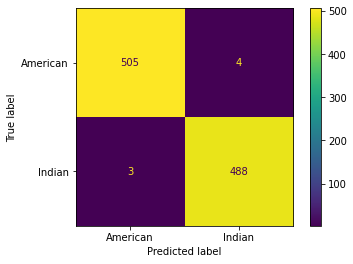

In [16]:
conf = confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(conf, display_labels = ['American', 'Indian'])

cm_display.plot()
plt.show()

# Results for WITH NER

In [17]:
nb_classifier.fit(X_train_ner, y_train_ner)

MultinomialNB()

In [18]:
# Make predictions about the test matrix
predictions_ner = nb_classifier.predict(X_test_ner)

In [19]:
accuracy = metrics.accuracy_score(y_test_ner, predictions_ner)
print(f"The accuracy of the naive Bayer Classifier is {accuracy * 100}")

The accuracy of the naive Bayer Classifier is 94.89999999999999


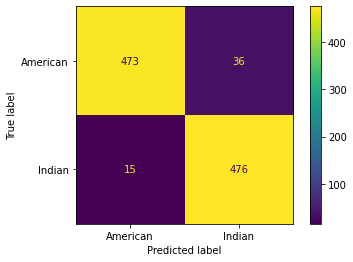

In [20]:
conf = confusion_matrix(y_test_ner, predictions_ner)
cm_display = metrics.ConfusionMatrixDisplay(conf, display_labels = ['American', 'Indian'])

cm_display.plot()
plt.show()